In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import exp,sqrt

In [11]:
n=6; m=100; ib=3; way=[]; a=0
X=np.random.uniform(a,m,n)
Y=np.random.uniform(a,m,n)

In [12]:
print(X, Y, n, sep='\n')

[74.63101205 97.28693258  8.27152209 73.16607691 92.38998655 94.9262968 ]
[79.14466115 58.25438236 40.37467764 48.50892691 17.48862013 33.8566454 ]
6


In [13]:
M = np.zeros([n,n]) # Шаблон матрицы относительных расстояний между пунктами

In [14]:
M

array([[0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]])

In [15]:
for i in np.arange(0, n, 1):
         for j in np.arange(0, n, 1):
                  if i != j:
                           M[i,j]=sqrt((X[i]-X[j])**2+(Y[i]-Y[j])**2) # Заполнение матрицы
                  else:
                           M[i,j]=float('inf')#Заполнение главной диагонали матрицы           
way.append(ib)

In [18]:
print(M)

[[        inf 30.81711347 76.85501629 30.67073927 64.16267272 49.62764304]
 [30.81711347         inf 90.79332103 26.0151798  41.05882914 24.51167416]
 [76.85501629 90.79332103         inf 65.4023643  87.17618763 86.89956688]
 [30.67073927 26.0151798  65.4023643          inf 36.49408356 26.23350001]
 [64.16267272 41.05882914 87.17618763 36.49408356         inf 16.56336684]
 [49.62764304 24.51167416 86.89956688 26.23350001 16.56336684         inf]]


In [19]:
for i in np.arange(1,n,1):
         s=[]
         for j in np.arange(0,n,1):                  
                  s.append(M[way[i-1],j])
         way.append(s.index(min(s))) # Индексы пунктов ближайших городов соседей
         for j in np.arange(0,i,1):
                  M[way[i],way[j]]=float('inf')
                  M[way[i],way[j]]=float('inf')

In [20]:
way

[3, 1, 5, 4, 0, 2]

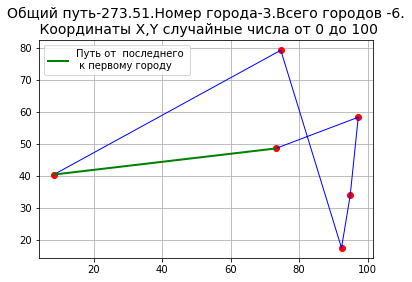

In [21]:
S=sum([sqrt((X[way[i]]-X[way[i+1]])**2+(Y[way[i]]-Y[way[i+1]])**2) for i in np.arange(0,n-1,1)])+ sqrt((X[way[n-1]]-X[way[0]])**2+(Y[way[n-1]]-Y[way[0]])**2)                      
plt.title('Общий путь-%s.Номер города-%i.Всего городов -%i.\n Координаты X,Y случайные числа от %i до %i'%(round(S,3),ib,n,a,m), size=14)
X1=[X[way[i]] for i in np.arange(0,n,1)]
Y1=[Y[way[i]] for i in np.arange(0,n,1)]    
plt.plot(X1, Y1, color='r', linestyle=' ', marker='o')
plt.plot(X1, Y1, color='b', linewidth=1)   
X2=[X[way[n-1]],X[way[0]]]
Y2=[Y[way[n-1]],Y[way[0]]]
plt.plot(X2, Y2, color='g', linewidth=2,  linestyle='-', label='Путь от  последнего \n к первому городу') 
plt.legend(loc='best')
plt.grid(True)
plt.show()  